In [1]:
using Plots, LaTeXStrings
using Plots.PlotMeasures
empty!(ARGS)
#push!(ARGS, "G:/Hamburg/b20.0_mu1.0/lDGAConfig.toml")
push!(ARGS, "G:/Hamburg/b20.0_mu1.0/lDGAConfig.toml")# "G:/tmp_ED_data/U2.0_b20.0_mu1.0.toml")
include(joinpath(@__DIR__,"../examples/example00_lDGA.jl"))

using LaTeXStrings

  Activating project at `G:\Codes\LadderDGA.jl`


[ Info: Reading Inputs...
[ Info: m channel: |∑χ(q=0,ω≠0)| = 0.000297843848 ≟ 0
[ Info: d channel: |∑χ(q=0,ω≠0)| = 0.000209554839 ≟ 0
╭──── λ-correction (type: LadderDGA.LambdaCorrection.mCorrection),... ─────────╮
│  λm = 0.10852026, λd = 0.00000000, μ = 0.96591298, n = 0.99736161            │
│  PP_1   =  0.24999903,  PP_2   =  0.24999903,  Δ = 0.0000%                   │
│  Epot_1 =  0.10272905,  Epot_2 =  0.12356106,  Δ = 9.2059%                   │
│  Ekin_1 = -0.22279173,  Ekin_2 = -0.20903607,  Δ = 3.1854%                   │
│                                                                              │
╰──────────────────────────────────────────────────────────────────────────────╯
╭──── λ-correction (type: LadderDGA.LambdaCorrection.dmCorrection),... ────────╮
│  λm = 0.10635214, λd = 12.69884259, μ = 0.97102826, n = 0.99746854           │
│  PP_1   =  0.24999903,  PP_2   =  0.24999903,  Δ = 0.0000%                   │
│  Epot_1 =  0.08464865,  Epot_2 =  0.08464865,  Δ = 0.0

In [2]:
res_m_ntc  = λm_correction(χm, γm, χd, γd, λ₀, lDGAhelper, tc=:plain)
res_m      = λm_correction(χm, γm, χd, γd, λ₀, lDGAhelper, tc=:full); print(res_m)
res_dm_ntc = λdm_correction(χm, γm, χd, γd, λ₀, lDGAhelper, tc=:plain)
res_dm     = λdm_correction(χm, γm, χd, γd, λ₀, lDGAhelper, tc=:full)

╭──── λ-correction (type: LadderDGA.LambdaCorrection.mCorrection),... ─────────╮
│  λm = 0.10852026, λd = 0.00000000, μ = 0.96521993, n = 0.99734713            │
│  PP_1   =  0.24999903,  PP_2   =  0.24999903,  Δ = 0.0000%                   │
│  Epot_1 =  0.10477456,  Epot_2 =  0.12356106,  Δ = 8.2276%                   │
│  Ekin_1 = -0.22501136,  Ekin_2 = -0.20903607,  Δ = 3.6805%                   │
│                                                                              │
╰──────────────────────────────────────────────────────────────────────────────╯


╭──── λ-correction (type: LadderDGA.LambdaCorrection.dmCorrection),... ────────╮
│  λm = 0.10749338, λd = 3.76333511, μ = 0.96495795, n = 0.99734165            │
│  PP_1   =  0.24999903,  PP_2   =  0.24999903,  Δ = 0.0000%                   │
│  Epot_1 =  0.10685015,  Epot_2 =  0.10685015,  Δ = 0.0000%                   │
│  Ekin_1 = -0.23077724,  Ekin_2 = -0.20903607,  Δ = 4.9433%                   │
│                                                                              │
╰──────────────────────────────────────────────────────────────────────────────╯


In [3]:
mP = lDGAhelper.mP
kG = lDGAhelper.kG
U = mP.U
nden = mP.n
beta = mP.β
lim_se = U^2 * (nden/2) * (1 - nden/2)
xr = collect(axes(se_ntc,2))
iν_arr = LadderDGA.iν_array(beta, xr)
gimp = lDGAhelper.gImp[1,xr]
#se_ntc
λm_test = res_dm_ntc.λm
λd_test = res_dm_ntc.λd
Σλ_ntc = calc_Σ(χm, γm, χd, γd, λ₀, lDGAhelper; λm = λm_test, λd = λd_test, tc = false);
Σλ_tc = calc_Σ(χm, γm, χd, γd, λ₀, lDGAhelper; λm = λm_test, λd = λd_test, tc = true);
tc_factor = LadderDGA.tail_factor(mP.U, mP.β, mP.n, lDGAhelper.Σ_loc, iν_arr)
tc_term  = LadderDGA.tail_correction_term(sum_kω(kG, χm, λ = λm_test), lDGAhelper.χloc_m_sum, tc_factor)

plot(xr, real(Σλ_ntc[1,:].parent .* iν_arr), ylims=(0.85,1.25), markershape=:auto, label = L"\mathrm{plain}", xlabel=L"n", ylabel= L"\Sigma \cdot \nu_n",xtickfontsize=12,ytickfontsize=12,xguidefontsize=20,yguidefontsize=20,legendfontsize=12)
plot!(xr, real(Σλ_tc[1,:].parent .* iν_arr), markershape=:auto, label = L"\mathrm{improved}")
plot!(xr, real(gimp .* iν_arr), markershape=:auto, label = L"G_\mathrm{imp}")
hline!([lim_se], linewidth=2, label=L"U^2 \frac{n}{2} \left(1 - \frac{n}{2} \right)")
#plot!(xr, real((Σλ_ntc[:,:].parent .+ (tc_term .* (1)  ))[3,:] .* iν_arr), markershape=:auto, label = L"\mathrm{improved}", ylims=(0.95,1.15), legend=:left)

LoadError: TypeError: in keyword argument tc, expected Symbol, got a value of type Bool

In [4]:
plot(xr, imag(Σλ_ntc[1,:].parent), markershape=:auto, markersize=8, label = L"\mathrm{plain}", xlabel=L"n", ylabel= L"\Sigma",xtickfontsize=12,ytickfontsize=12,xguidefontsize=20,yguidefontsize=20,legendfontsize=12)
plot!(xr, imag(Σλ_tc[1,:].parent), markershape=:auto, label = L"\mathrm{impr}")
plot!(xr, imag(gimp ), markershape=:auto, label = L"G_\mathrm{imp}")

LoadError: UndefVarError: `Σλ_ntc` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

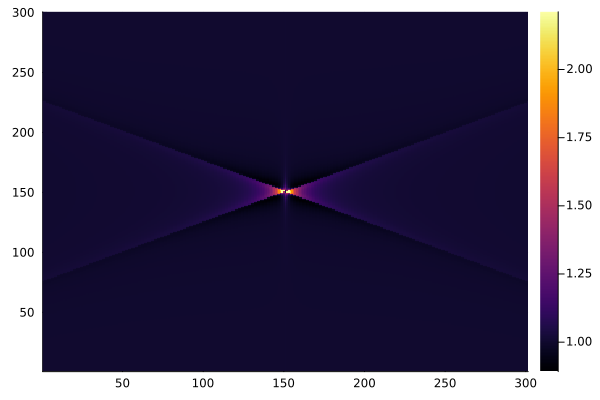

In [5]:
heatmap(real(γm[end,:,:]))

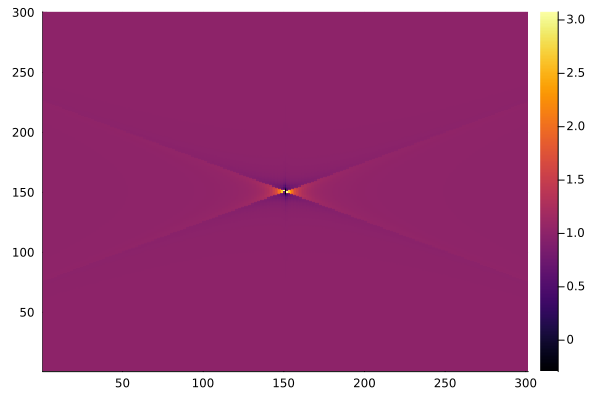

In [11]:
heatmap(real(γd[2,:,:]))

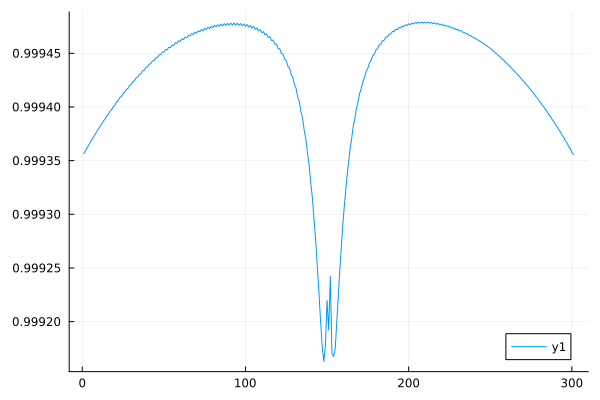

In [7]:
plot(real(γd[end,1,:]))

In [8]:
results_λm, results_λd, results_n, results_mu, results_E_kin_1, results_E_pot_1, results_E_pot_2, results_E_lhs_c1 = LadderDGA.LambdaCorrection.λdm_correction_curve(χm, γm, χd, γd, λ₀, lDGAhelper; λd_max=30.0, λd_samples=500, tc=true)
plot(results_λd, results_E_pot_2 .- results_E_pot_1, markershape=:auto, xlabel=L"\lambda_\mathrm{d}", ylabel=L"E^{(2)}_\mathrm{pot} - E^{(1)}_\mathrm{pot}", label="No Tail Correction")

LoadError: UndefVarError: `λdm_correction_curve` not defined in `LadderDGA.LambdaCorrection`
Suggestion: check for spelling errors or missing imports.